# What is the impact of class imbalance and different sampling methods on the performance of machine learning algorithms for classification?

Class imbalance is a common challenge in many real-world classification problems. Having significantly fewer samples for one class can lead to biasad models that favor the majority class. This results in poor performance in detecting the minority class. In this research project, we investigate the impact of class imbalance on the performance of two popular machine learning algorithms: Support Vector Machines (SVM) and Neural Networks (NN). We compare the in-sample and out-of-sample performance of these algorithms on datasets with varying degrees of class imbalance using different techniques to adress this issue. Our goal is to provide insights into strengths and weaknesses of each algorithm and to identify the effective approach.


# Support Vector Machines

# Neural Networks

# The impact of class imbalance, comparing Support Vector Machines with Neural Networks

In [1]:
#import required for libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn


from sklearn.svm import LinearSVC
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

#from sklearn.inspection import DecisionBoundaryDisplay
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN, SMOTE
from imblearn import FunctionSampler  # to use a idendity sampler
from imblearn.pipeline import make_pipeline


In [9]:
# 3 of 8 random state
def create_dataset(weights, n_samples, n_classes,
                   class_sep, n_clusters):
    return make_classification(n_samples=n_samples, n_features=2,
                               n_informative=2, n_redundant=0, n_repeated=0,
                               n_classes=n_classes,
                               n_clusters_per_class=n_clusters,
                               weights=list(weights),
                               class_sep=class_sep, random_state=5)

In [10]:
def plot_decision_function(X, y, clf, ax):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')

# SYNTHETIC DATASET

Class imbalance refers to a situation where the number of samples in different classes of a dataset is significantly uneven. This can have an impact on the decision boundary learned by a machine learning model, potentially leading to biased or skewed predictions. To illustrate the impact of class imbalances on the decision boundry we generated 4 synthetic datasets. Each set contains 2 classes but the level of imbalance vary.

1. Very unbalanced dataset: \
One class is heavily overrepresented, while the other class is underrepresented. This extreme class imbalance can make it challenging for a model to accurately learn the minority class, as the decision boundary may prioritize the majority class.
2. Unbalanced dataset: \
The majority class is still overrepresented but the imbalance is not as extreme as the very unbalanced dataset. The decision boundary in this case may show some consideration for the minority class, but it still is influenced by the majority class.
3. Moderate unbalanced dataset \
This dataset still exhibits a noticeable class imbalance, but to a lesser extent compared to the previous dataset.  The decision boundary learned by a model on this dataset may be more balanced, giving reasonable consideration to both classes.
4. Balanced Dataset: \
The last dataset is balanced, with an equal number of samples in each class. There is no class imbalance present, and the decision boundary learned by a model on this dataset should ideally provide fair and accurate predictions for both classes.

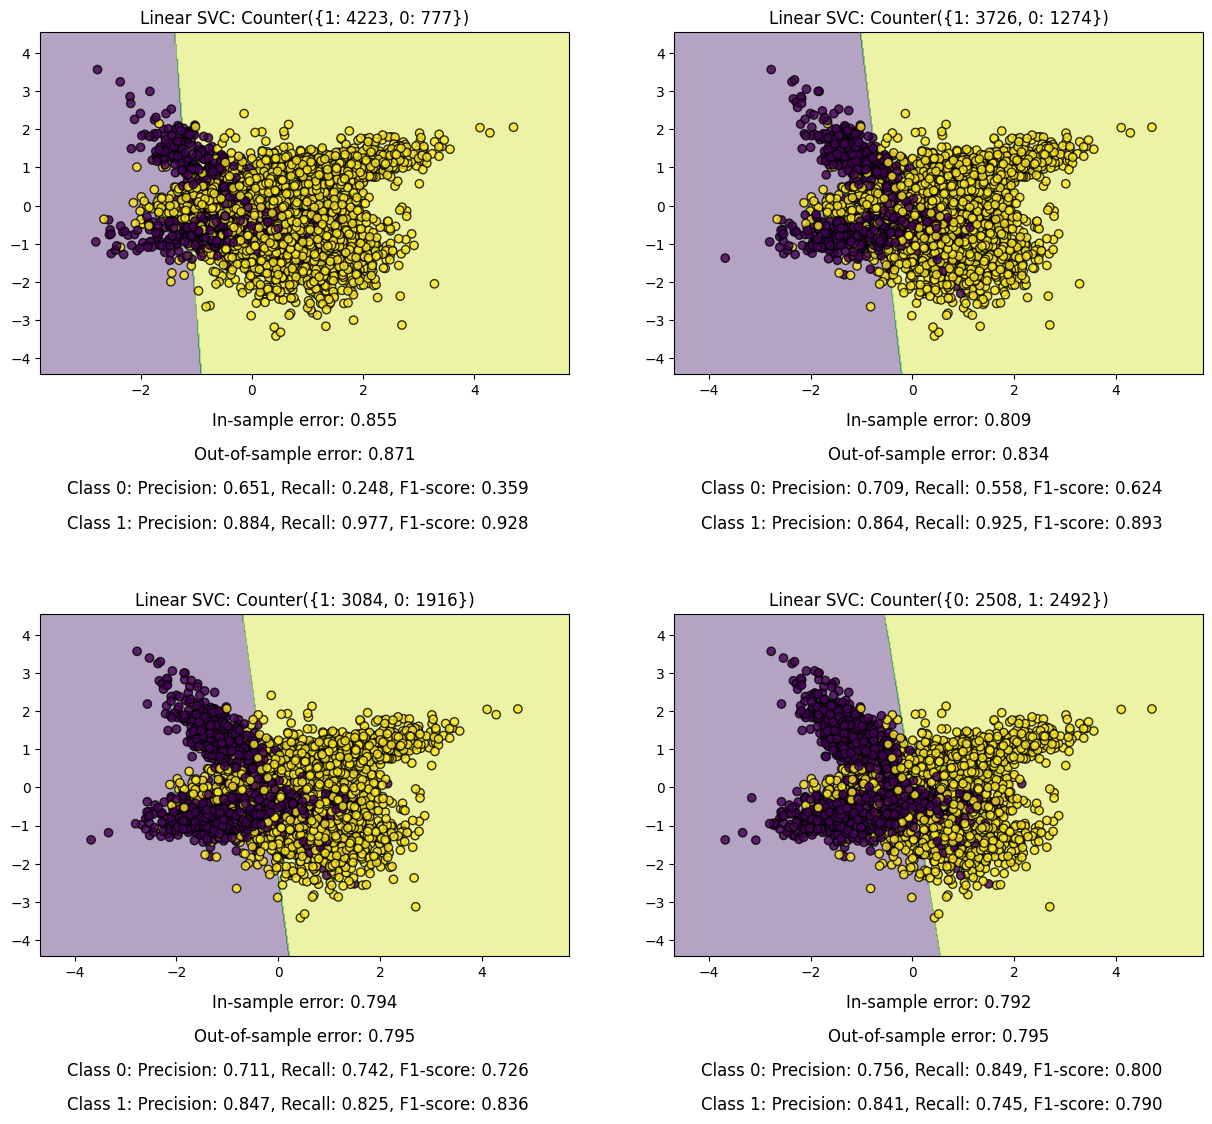

In [11]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.subplots_adjust(wspace=0.2, hspace=0.7)

ax_arr = (ax1, ax2, ax3, ax4)
weights_arr = ((0.15, 0.85), (0.25, 0.75),
               (0.38, 0.62), (0.5, 0.5))
for ax, weights in zip(ax_arr, weights_arr):
    X, y = create_dataset(weights=weights, n_samples=5000, n_classes=2,
                   class_sep=0.65, n_clusters=2)
 
    ax.set_title('Linear SVC: {}'.format(Counter(y)))
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    clf = LinearSVC().fit(X_train, y_train)
    
    plot_decision_function(X, y, clf, ax)
    
    y_true = y_test
    
    
    # compute in-sample error (accuracy on the training set)
    y_pred_train = clf.predict(X_train)
    in_sample_error = accuracy_score(y_train, y_pred_train)

    # compute out-of-sample error (accuracy on the testing set)
    y_pred_test = clf.predict(X_test)
    out_of_sample_error = accuracy_score(y_test, y_pred_test)
    
    cm = confusion_matrix(y_true, y_pred_test)
    
    ax.text(0.5, -0.15, "In-sample accuracy: {:.3f}".format(in_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
    ax.text(0.5, -0.25, "Out-of-sample error: {:.3f}".format(out_of_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
    
    class_labels = np.unique(y)
    report = classification_report(y_true, y_pred_test, zero_division=1, output_dict=True)

    for i, label in enumerate(class_labels):
        ax.text(0.05, -0.35-i*0.1, "Class {}: Precision: {:.3f}, Recall: {:.3f}, F1-score: {:.3f}".format(label, report[str(label)]['precision'], report[str(label)]['recall'], report[str(label)]['f1-score']), transform=ax.transAxes, fontsize=12)




When working with imbalanced datasets it is important not only to look at the in and out of sample error as a metric to evaluate the performance of the model. Due to the class imbalance, these metrics can be misleading and do not reflect how well the model is handling the minority class. 
Precision is the ratio of true positives to all the positves. It measures the model's ability to correctly identify positive instances. A high precision indicates a low rate of false positive predictions.
Recall on the other hand is the ratio of true positives to sum of true positives and false negatives. It measures the model's abilility to correctly identify true positive instances. It is also called the Sensitivity or the True Positive Rate. A high recall indicates a low rate of false negatives.
The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of a model's performance on both precision and recall. 
These metrics provide a more nuanced understanding of how well the model is performing on imbalanced datasets as they can highlight the model's ability to handle the minority class.

IN SOME CASE YOU WANT RECALL HIGHER SOMETIMES PRECISION ........ BALANCE TRADEOFF (SWS NOG BESPREKEN ZBE)


By looking at the in and out of sample error we can conclude that the model predicting the most unbalanced dataset scored best. The precision of the majority class is both around .9 indicating is has a low rate of false positives and negatives. The model is able to accuratly predict the majority class. Because the class is very unbalanced this means the model is able correctly classifiy the larger majority of the dataset leading to an in and out of sample error of approximately 0.85. 

However, the precision of the minority class is only 0.524 indicating the model correctly predicts an instance as positive, around 50% of the time. Toghether with a recall close to zero,  it means the model is failing to capture the positive instances, as the F1 score of 0.092 confirms. (this model would be dramatic for real world datasets kanker en heart disease). 

As the datasets gets slightly more balanced the precision, recall and F1-score of minority class improves while keeping the same precision and recall for the majority set. This indicates that balancing the dataset allows the model to have a better opportunity to learn from both classes.



# Neural Nets

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

#Eliminates warnings
#anders altijd warning omdat model niet meer converged

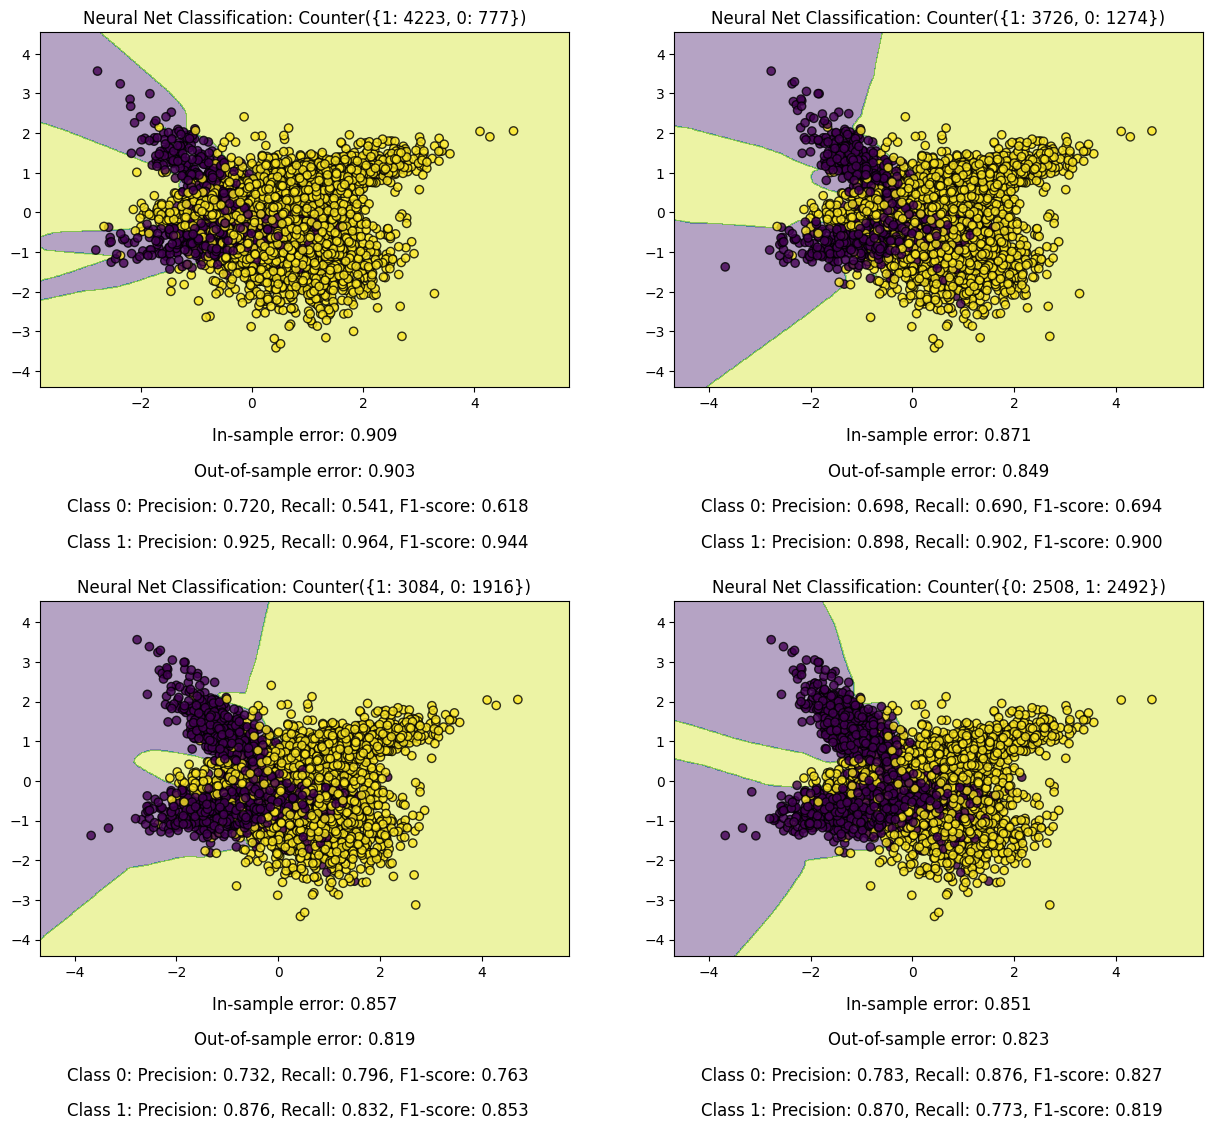

In [12]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.subplots_adjust(wspace=0.2, hspace=0.6)

ax_arr = (ax1, ax2, ax3, ax4)
weights_arr = ((0.15, 0.85), (0.25, 0.75),
               (0.38, 0.62), (0.5, 0.5))
for ax, weights in zip(ax_arr, weights_arr):
    X, y = create_dataset(weights=weights, n_samples=5000, n_classes=2, class_sep=0.65, n_clusters=2)
 
    ax.set_title('Neural Net Classification: {}'.format(Counter(y)))
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Neural Net
    
    params = {
        'hidden_layer_sizes': (40, 100, 80),
        'random_state' : 20,
        'max_iter': 1000,
        'n_iter_no_change' : 200
    }
    clf = MLPClassifier(**params, activation='relu').fit(X_train, y_train)
    
    plot_decision_function(X, y, clf, ax)
    
    y_true = y_test
    
    # compute in-sample error (accuracy on the training set)
    y_pred_train = clf.predict(X_train)
    in_sample_error = accuracy_score(y_train, y_pred_train)

    # compute out-of-sample error (accuracy on the testing set)
    y_pred_test = clf.predict(X_test)
    out_of_sample_error = accuracy_score(y_test, y_pred_test)
    
    ax.text(0.5, -0.15, "In-sample error: {:.3f}".format(in_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
    ax.text(0.5, -0.25, "Out-of-sample error: {:.3f}".format(out_of_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
    
    class_labels = np.unique(y)
    report = classification_report(y_true, y_pred_test, zero_division=1, output_dict=True)

    for i, label in enumerate(class_labels):
        ax.text(0.05, -0.35-i*0.1, "Class {}: Precision: {:.3f}, Recall: {:.3f}, F1-score: {:.3f}".format(label, report[str(label)]['precision'], report[str(label)]['recall'], report[str(label)]['f1-score']), transform=ax.transAxes, fontsize=12)

Based on our observation, we find that a neural network is less influenced by the class imbalance compared to a SVM. This suggests that a neural network may have inherent capabilities to handle the imbalanced dataset more effectively. They can learn complex patterns from data and adapt their internal parameters to handle the class imbalance.

The in and out of sample error of NN and SVM prediction the most unbalanced dataset is comparable. However, when considering precision, recall, and F1-score, the NN demonstrates superior performance. 


A recall of 0.46 for the NN indicates that it is able to correctly identify a larger proportion of positive instances in the minority class compared to the SVM's recall of 0.05. Also the precision and F1-score are higher indicating the NN performs better across all three metrics. Although the metrics are higher, they are not at a satisfactory level. The class imbalance still poses a challange. We observe that also here, the metrics improve as the classes get more balanced, indicating the potential of additional techniques to improve performance.

# OVERSAMPLING 

## Random over-sampling
The most naive class of techniques for dealing with class imbalances is sampling. Random over-sampling involves duplicating some of the minority class samples at random until the dataset is balanced. This helps the model to earn from more examples of the minority class, potentially improving its ability to classify these instances accuratly. 
However, this approach of duplicating may not effectively capture the underlying distribution of the minority class, leading to overfitting and biased results.


## SMOTE & ADASYN
Synthetic Minority Over-Sampling (SMOTE) and Adaptive Synthetic Sampling (ADASYN) are a more advanced technique that generates samples based on the interpolation. However, the samples used to interpolate new synthetic samples differ. ADASYN is and extension of SMOTE and focussen of generating samples next to the original samples which are wrongly classified using a k-Nearest Neighbors classifier. SMOTE will not make any distinction between easy and hard samples and generates samples uniformly across the minority class.(https://imbalanced-learn.org/stable/over_sampling.html#smote-adasyn). 


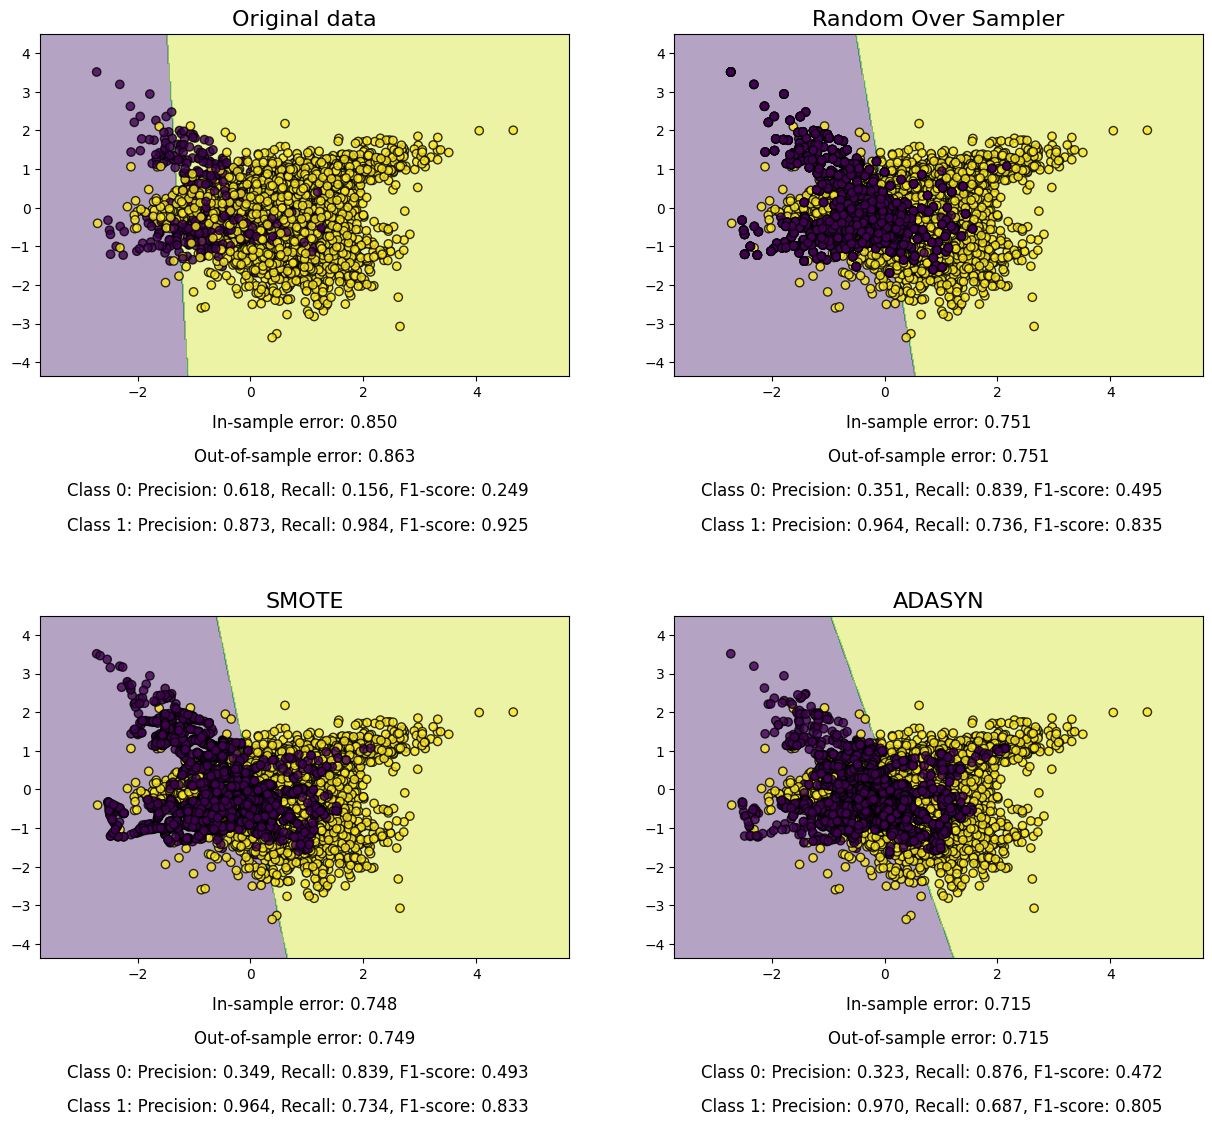

In [17]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.subplots_adjust(wspace=0.2, hspace=0.7)

ax_arr = (ax1, ax2, ax3, ax4)
samplers = [
    FunctionSampler(),
    RandomOverSampler(random_state=0),
    SMOTE(random_state=0),
    ADASYN(random_state=0),
]

titles = ["Original data", "Random Over Sampler", "SMOTE", "ADASYN"]

for ax, sampler, title in zip(ax_arr, samplers, titles):
    X, y = create_dataset(weights=(0.15, 0.85), n_samples=5000, n_classes=2,
                   class_sep=0.6, n_clusters=2)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    clf = LinearSVC()
    
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    clf.fit(X_resampled, y_resampled)
    plot_decision_function(X_resampled, y_resampled, clf, ax)
    
    ax.set_title(title, fontsize=16)
    
    #ax.set_title('Neural Net Classification: {}'.format(Counter(y)))
        
    #plot_decision_function(X, y, clf, ax) 
    
    # compute in-sample error (accuracy on the training set)
    y_pred_train = clf.predict(X_train)
    in_sample_error = accuracy_score(y_train, y_pred_train)

    # compute out-of-sample error (accuracy on the testing set)
    y_pred_test = clf.predict(X_test)
    out_of_sample_error = accuracy_score(y_test, y_pred_test)
    
    ax.text(0.5, -0.15, "In-sample error: {:.3f}".format(in_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
    ax.text(0.5, -0.25, "Out-of-sample error: {:.3f}".format(out_of_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
    
    y_true = y_test
    
    class_labels = np.unique(y)
    report = classification_report(y_true, y_pred_test, zero_division=1, output_dict=True)

    for i, label in enumerate(class_labels):
        ax.text(0.05, -0.35-i*0.1, "Class {}: Precision: {:.3f}, Recall: {:.3f}, F1-score: {:.3f}".format(label, report[str(label)]['precision'], report[str(label)]['recall'], report[str(label)]['f1-score']), transform=ax.transAxes, fontsize=12)

To evaluate and compare the effect of different over-sampling techniques we used the most unbalanced synthetic dataset from the first comparison. We observe an improvement in recall compared to the baseline. This improvement suggests that the models are better at recognizing the minority class and reducing false negative mistakes.

An imidiate observation is the improvement of the recall. This indicates the model is better at recognizing the minority class and does not make as many false negative mistakes.

# OverSampling - Neural Network

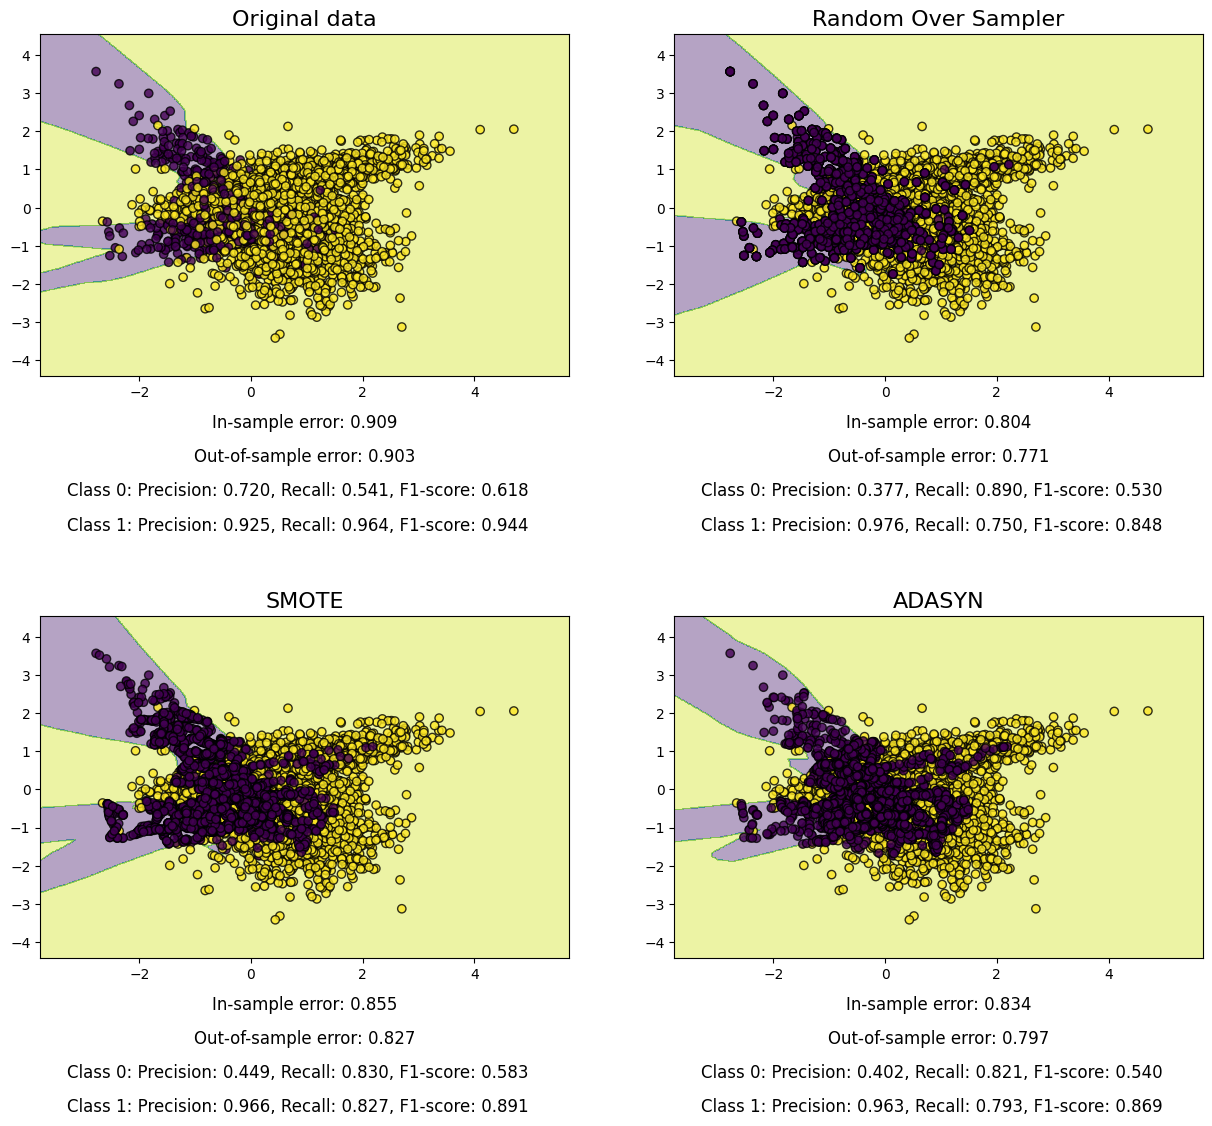

In [16]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.subplots_adjust(wspace=0.2, hspace=0.7)

ax_arr = (ax1, ax2, ax3, ax4)
samplers = [
    FunctionSampler(),
    RandomOverSampler(random_state=0),
    SMOTE(random_state=0),
    ADASYN(random_state=0),
]

titles = ["Original data", "Random Over Sampler", "SMOTE", "ADASYN"]

for ax, sampler, title in zip(ax_arr, samplers, titles):
    X, y = create_dataset(weights=(0.15, 0.85), n_samples=5000, n_classes=2,
                   class_sep=0.65, n_clusters=2)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    
    params = {
        'hidden_layer_sizes': (40, 100, 80),
        'random_state' : 20,
        'max_iter': 1000,
        'n_iter_no_change' : 200
    }
    clf = MLPClassifier(**params, activation='relu')
    
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    model = clf.fit(X_resampled, y_resampled)
    plot_decision_function(X_resampled, y_resampled, clf, ax)
    
    ax.set_title(title, fontsize=16)
    
        
    #plot_decision_function(X, y, clf, ax) 
    
    # compute in-sample error (accuracy on the training set)
    y_pred_train = clf.predict(X_train)
    in_sample_error = accuracy_score(y_train, y_pred_train)

    # compute out-of-sample error (accuracy on the testing set)
    y_pred_test = clf.predict(X_test)
    out_of_sample_error = accuracy_score(y_test, y_pred_test)
    
    ax.text(0.5, -0.15, "In-sample error: {:.3f}".format(in_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
    ax.text(0.5, -0.25, "Out-of-sample error: {:.3f}".format(out_of_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
    
    y_true = y_test
    
    class_labels = np.unique(y)
    report = classification_report(y_true, y_pred_test, zero_division=1, output_dict=True)

    for i, label in enumerate(class_labels):
        ax.text(0.05, -0.35-i*0.1, "Class {}: Precision: {:.3f}, Recall: {:.3f}, F1-score: {:.3f}".format(label, report[str(label)]['precision'], report[str(label)]['recall'], report[str(label)]['f1-score']), transform=ax.transAxes, fontsize=12)

In [ ]:
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import EditedNearestNeighbours

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.subplots_adjust(wspace=0.2, hspace=0.7)

ax_arr = (ax1, ax2, ax3, ax4)
samplers = [
    FunctionSampler(),
    RandomUnderSampler(random_state=0),
    ClusterCentroids(random_state=0),
    EditedNearestNeighbours(kind_sel="all"),
]

titles = ["Original data", "Random Over Sampler", "SMOTE", "ADASYN"]

for ax, sampler, title in zip(ax_arr, samplers, titles):
    X, y = create_dataset(weights=(0.15, 0.85), n_samples=50000, n_classes=2,
                   class_sep=0.65, n_clusters=2)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    
    params = {
        'hidden_layer_sizes': (40, 100, 80),
        'random_state' : 20,
        'max_iter': 1000,
        'n_iter_no_change' : 200
    }
    clf = MLPClassifier(**params, activation='relu').fit(X_train, y_train)
    
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    model = clf.fit(X_resampled, y_resampled)
    plot_decision_function(X_resampled, y_resampled, clf, ax)
    
    ax.set_title(title, fontsize=16)
    
        
    #plot_decision_function(X, y, clf, ax) 
    
    # compute in-sample error (accuracy on the training set)
    y_pred_train = clf.predict(X_train)
    in_sample_error = accuracy_score(y_train, y_pred_train)

    # compute out-of-sample error (accuracy on the testing set)
    y_pred_test = clf.predict(X_test)
    out_of_sample_error = accuracy_score(y_test, y_pred_test)
    
    ax.text(0.5, -0.15, "In-sample error: {:.3f}".format(in_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
    ax.text(0.5, -0.25, "Out-of-sample error: {:.3f}".format(out_of_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
    
    y_true = y_test
    
    class_labels = np.unique(y)
    report = classification_report(y_true, y_pred_test, zero_division=1, output_dict=True)

    for i, label in enumerate(class_labels):
        ax.text(0.05, -0.35-i*0.1, "Class {}: Precision: {:.3f}, Recall: {:.3f}, F1-score: {:.3f}".format(label, report[str(label)]['precision'], report[str(label)]['recall'], report[str(label)]['f1-score']), transform=ax.transAxes, fontsize=12)

/home/milan/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [5]:
import tensorflow as tf
from tensorflow.keras import backend as K

def mean_false_error(y_true, y_pred):
    # Define epsilon so that we do not get 'division by zero' error
    epsilon = K.epsilon()

    # Convert predictions to binary values (0 and 1)
    y_pred_binary = K.round(K.clip(y_pred, 0, 1))

    # Identify False Positives and False Negatives
    false_positives = K.clip((y_pred_binary - y_true), 0, 1)
    false_negatives = K.clip((y_true - y_pred_binary), 0, 1)

    # Calculate errors for each class
    fp_error = K.square(y_pred - y_true) * false_positives
    fn_error = K.square(y_pred - y_true) * false_negatives

    # Calculate FPE and FNE
    fpe = K.sum(fp_error) / (K.sum(false_positives) + epsilon)
    fne = K.sum(fn_error) / (K.sum(false_negatives) + epsilon)

    return fpe + fne

2023-05-25 12:12:19.781624: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-25 12:12:19.822253: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-25 12:12:19.822640: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-25 12:12:20.590920: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(2,), name="imbalance")
x = layers.Dense(64, activation="relu", name="dense_1")(inputs)
x = layers.Dense(64, activation="relu", name="dense_2")(x)
outputs = layers.Dense(2, activation="softmax", name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [36]:
X, y = create_dataset(weights=(0.85, 0.15), n_samples=5000, n_classes=2,
                   class_sep=0.65, n_clusters=2)
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# First, let's create your dataset
X, y = make_classification(weights=(0.85, 0.15), n_samples=50000, n_classes=2, class_sep=0.65, n_clusters_per_class=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the custom loss function
def mean_false_error(y_true, y_pred):
    # Define epsilon to prevent 'division by zero' error
    epsilon = K.epsilon()

    # Convert predictions to binary values (0 and 1)
    y_pred_binary = K.round(K.clip(y_pred, 0, 1))

    # Convert y_true to the same type as y_pred
    y_true = tf.cast(y_true, tf.float32)

    # Identify False Positives and False Negatives
    false_positives = K.clip((y_pred_binary - y_true), 0, 1)
    false_negatives = K.clip((y_true - y_pred_binary), 0, 1)

    # Calculate errors for each class
    fp_error = K.square(y_pred - y_true) * false_positives
    fn_error = K.square(y_pred - y_true) * false_negatives

    # Calculate FPE and FNE
    fpe = K.sum(fp_error) / (K.sum(false_positives) + epsilon)
    fne = K.sum(fn_error) / (K.sum(false_negatives) + epsilon)

    return fpe + fne

# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(Dense(64, activation='relu')) 
model.add(Dense(46, activation='relu'))# Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model with the custom loss function
model.compile(loss=mean_false_error, optimizer='adam', metrics=['acc',f1_m,precision_m, recall_m])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
1094/1094 [==============================] - 2s 957us/step - loss: 0.4195 - acc: 0.8193 - f1_m: 0.5100 - precision_m: 0.5317 - recall_m: 0.6192
Epoch 2/50
1094/1094 [==============================] - 1s 983us/step - loss: 0.3646 - acc: 0.8032 - f1_m: 0.5399 - precision_m: 0.5725 - recall_m: 0.6828
Epoch 3/50
1094/1094 [==============================] - 1s 933us/step - loss: 0.3448 - acc: 0.7791 - f1_m: 0.5387 - precision_m: 0.5868 - recall_m: 0.6925
Epoch 4/50
1094/1094 [==============================] - 1s 921us/step - loss: 0.3376 - acc: 0.7699 - f1_m: 0.5450 - precision_m: 0.5807 - recall_m: 0.7127
Epoch 5/50
1094/1094 [==============================] - 1s 926us/step - loss: 0.3214 - acc: 0.7403 - f1_m: 0.5293 - precision_m: 0.5716 - recall_m: 0.7146
Epoch 6/50
1094/1094 [==============================] - 1s 920us/step - loss: 0.3172 - acc: 0.7293 - f1_m: 0.5483 - precision_m: 0.5866 - recall_m: 0.7391
Epoch 7/50
1094/1094 [==============================] - 1s 919us/step 

In [65]:
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)


Evaluate on test data
118/118 [==============================] - 0s 821us/step - loss: 0.3802 - acc: 0.9642 - f1_m: 0.8712 - precision_m: 0.9539 - recall_m: 0.8065
test loss, test acc: [0.38017210364341736, 0.9642000198364258, 0.8711714744567871, 0.9538975358009338, 0.8064903616905212]


In [66]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)
print(recall)

0.8080899715423584
